# **DATA UNDERSTANDING**

## **Context**

Database Northwind ini menggambarkan database milik suatu perusahaan fiktif yang bernama Northwind Traders dimana perusahaan ini bergerak dalam bidang eksport import makanan. Dalam database ini terdapat tabel-tabel seperti layaknya dalam suatu perusahaan eksport import seperti tabel Customers, Employee, Orders, Suppliers dan lain sebagainya.

## **Database Information**

Sumber Database: https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i

Database yang dimiliki mempunyai 13 tabel, yaitu:
- Customers     : Menyimpan informasi tentang data pelanggan/customer.
- Customer Demographics : Menyimpan informasi demografis dari customer
- Suppliers     : Menyimpan infrormasi pihak / perusahaan pemasok produk-produk untuk perusahaan Northwind.
- Shippers      : Menyimpan informasi pihak kurir / pengirim.
- Employees     : Menyimpan semua informasi tentang karyawan.
- Products      : Menyimpan informasi tentang jenis produk.
- Categories    : Menyimpan informasi tentang kategori jenis produk beserta detail informasi lainnya.
- Orders        : Menyimpan informasi jual-beli yang dilakukan oleh pelanggan.
- OrderDetails  : Menyimpan detail dari setiap pesanan yang dilakukan oleh pelanggan.
- Region        : Menyimpan informasi seluruh region pada data.
- Territories   : Menyimpan informasi seluruh territories pada data.
- Employee Territories  : Menyimpan informasi teritori / lokasi kerja karyawan Northwind. 

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

In [1]:
!pip install mysql-connector-python

# **DATABASE**

## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``northwind database``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.


In [2]:
# Import Modules

import pandas as pd
import numpy as np

import mysql.connector
import mysql.connector as sqlcon

In [3]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'Qwerty123@',
    database = 'northwind'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [4]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## **Data Detail dan Keuntungan Transaksi**
Data pertama ini merupakan data yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 4 tabel utama, yaitu tabel ```employee```, ```employeeterritories```, ```territories```, dan ```region```.

In [5]:
# Query table 00

tabel0 = sql_table (
    '''
select e.EmployeeID, e.FirstName, e.LastName, e.Title, e.TitleOfCourtesy, e.BirthDate, e.HireDate, e.Address, e.City, e.Region, e.PostalCode, e.Country, e.HomePhone, e.Extension, e.Notes, e.ReportsTo, e.PhotoPath, e.Salary,
et.EmployeeID, et.TerritoryID,
te.TerritoryID, te.TerritoryDescription, te.RegionID,
r.RegionID, r.RegionDescription
from employees e
left join employeeterritories et on e.EmployeeID = et.EmployeeID
left join territories te on et.TerritoryID = te.TerritoryID 
left join region r on te.RegionID = r.RegionID;
    '''
)

tabel0.head(2) # 49 rows × 25 columns

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,...,ReportsTo,PhotoPath,Salary,EmployeeID,TerritoryID,TerritoryID,TerritoryDescription,RegionID,RegionID,RegionDescription
0,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,WA,...,2.0,http://accweb/emmployees/davolio.bmp,2954.55,1,06897,06897,Wilton ...,1,1,Eastern ...
1,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,WA,...,2.0,http://accweb/emmployees/davolio.bmp,2954.55,1,19713,19713,Neward ...,1,1,Eastern ...


Data berikutnya merupakan data gabungan dari 5 tabel utama, yaitu tabel ```employee```, ```employeeterritories```, ```territories```, ```region```, dan ```order```.

In [6]:
# Query table 01

tabel1 = sql_table (
    '''
select e.EmployeeID, e.FirstName, e.LastName, e.Title, e.TitleOfCourtesy, e.BirthDate, e.HireDate, e.Address, e.City, e.Region, e.PostalCode, e.Country, e.HomePhone, e.Extension, e.Notes, e.ReportsTo, e.PhotoPath, e.Salary,
o.OrderID, o.CustomerID, o.EmployeeID, o.OrderDate, o.RequiredDate, o.ShippedDate, o.ShipVia, o.Freight, o.ShipName, o.ShipAddress, o.ShipCity, o.ShipRegion, o.ShipPostalCode, o.ShipCountry,
et.EmployeeID, et.TerritoryID,
te.TerritoryID, te.TerritoryDescription, te.RegionID,
r.RegionID, r.RegionDescription
from employees e
left join orders o on e.EmployeeID = o.EmployeeID
left join employeeterritories et on e.EmployeeID = et.EmployeeID
left join territories te on et.TerritoryID = te.TerritoryID 
left join region r on te.RegionID = r.RegionID;
    '''
)

tabel1.head(2) # 3.960 rows × 39 columns

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,...,ShipRegion,ShipPostalCode,ShipCountry,EmployeeID,TerritoryID,TerritoryID,TerritoryDescription,RegionID,RegionID,RegionDescription
0,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,WA,...,None,8010,Austria,1,06897,06897,Wilton ...,1,1,Eastern ...
1,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,WA,...,None,8010,Austria,1,19713,19713,Neward ...,1,1,Eastern ...


Kemudian terdapat data kedua yang dapat digunakan dalam proses analisa lanjutan dari data sebelumnya. Data dibawah merupakan gabungan dari 4 tabel, yaitu tabel ```order```, ```orderdetails```, ```products```, dan ```categories```.

In [7]:
# Query table 02

tabel2 = sql_table (
    '''
select od.OrderID, od.ProductID, od.UnitPrice, od.Quantity, od.Discount,
o.OrderID, o.CustomerID, o.EmployeeID, o.OrderDate, o.RequiredDate, o.ShippedDate, o.ShipVia, o.Freight, o.ShipName, o.ShipAddress, o.ShipCity, o.ShipRegion, o.ShipPostalCode, o.ShipCountry,
p.ProductID, p.ProductName, p.SupplierID, p.CategoryID, p.QuantityPerUnit, p.UnitPrice, p.UnitsInStock, p.UnitsOnOrder, p.ReorderLevel, p.Discontinued,
c.CategoryID, c.CategoryName, c.Description,
round ((od.UnitPrice - p.UnitPrice),1) profitEach,((p.UnitsInStock + p.UnitsOnOrder) - od.Quantity) restStock
from orderdetails od
left join orders o on od.OrderID = o.orderID
left join products p on od.ProductID = p.ProductID
left join categories c on p.CategoryID = c.CategoryID;
    '''
)

tabel2.head(2) # 2.155 rows × 34 columns

,OrderID,ProductID,UnitPrice,Quantity,Discount,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,...,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryID,CategoryName,Description,profitEach,restStock
0,10248,11,14.0000,12,0.0,10248,VINET,5,1996-07-04,1996-08-01,...,21.0000,22,30,30,0,4,Dairy Products,Cheeses,-7.0,40
1,10248,42,9.8000,10,0.0,10248,VINET,5,1996-07-04,1996-08-01,...,14.0000,26,0,0,1,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",-4.2,16


Selain dari kolom pada tabel-tabel diatas, terdapat kolom tambahan yang diberinama ```profitEach``` yang merupakan selisih antara UnitPrice milik orderdetails (harga jual) dan UnitPrice milik products (Harga Beli); juga terdapat kolom yang bernama ```restStock``` yang merupakan hasil pengurangan antara UnitsInStock dan UnitsOnOrder.  

In [8]:
# Export data

# tabel0.to_excel('tabel0.xlsx', index=False)
# tabel1.to_excel('tabel1.xlsx', index=False)
# tabel2.to_excel('tabel2.xlsx', index=False)

## **Data Title, Jumlah, dan Sebaran Wilayah Employee**
Data selanjutnya merupakan gambaran tentang data Employee. Data ini memuat informasi mengenai title employee, mulai dari jumlah title yang ada hinga jumlah karyawannya. Kemudian disusul dengan informasi umur employee, serta sebaran country dari employee perusahaan Northwind.


In [9]:
# Check columns

# tabel0.columns
# tabel1.columns
# tabel2.columns

In [10]:
# Query 3 (Aggregating)
table3 = sql_table(
    '''
    SELECT title as Title, 
    COUNT(title) as Total_Karyawan
    FROM employees
    GROUP BY title
    ORDER BY Total_Karyawan DESC
    ;
    '''
)
table3.head()

,Title,Total_Karyawan
0,Sales Representative,6
1,"Vice President, Sales",1
2,Sales Manager,1
3,Inside Sales Coordinator,1


In [11]:
# Query 3 (Aggregating)
table4 = sql_table(
    '''
    SELECT title as Title, 
    COUNT(title) as Total,
    SUM(EmployeeID) JumlahKaryawan
    FROM employees
    GROUP BY title
    ORDER by Total
    ;
    '''
)
table4.head()

,Title,Total,JumlahKaryawan
0,"Vice President, Sales",1,2
1,Sales Manager,1,5
2,Inside Sales Coordinator,1,8
3,Sales Representative,6,30


In [12]:
# Query 4 (Aggregating)
table4 =sql_table(
    '''
    SELECT CONCAT(firstname, ' ' , lastname) as Fullname, 
    title as Title, 
    DATE_FORMAT(FROM_DAYS(DATEDIFF(now(),birthdate)), '%Y')+0 AS Age
    FROM employees
    '''
)
table4

,Fullname,Title,Age
0,Nancy Davolio,Sales Representative,73.0
1,Andrew Fuller,"Vice President, Sales",70.0
2,Janet Leverling,Sales Representative,58.0
3,Margaret Peacock,Sales Representative,84.0
4,Steven Buchanan,Sales Manager,67.0
5,Michael Suyama,Sales Representative,58.0
6,Robert King,Sales Representative,61.0
7,Laura Callahan,Inside Sales Coordinator,64.0
8,Anne Dodsworth,Sales Representative,56.0


In [13]:
# Query 5 (Aggregating)
table5 = sql_table(
    '''
    SELECT country as Country, COUNT(country) as TotalKaryawan 
    FROM employees
    GROUP BY country;
    '''
)
table5.head()

,Country,TotalKaryawan
0,USA,5
1,UK,4


## **Data Jenis Produk, Kuantitas, dan Total Harga Beli**
Data berikutnya merupakan informasi yang dapat menjadi data tambahan untuk melihat gambaran tentang data yang dimiliki. Data ini memuat jenis kategori produk yang dijual mulai dari confections hingga produce, lengkap dengan deskripsi, banyak kategori produk, jumlah unit stock, jumlah unit yang disorder, hingga harga belinya. Dari sini kita bisa melihat gambaran apakah kuantitas akan memberikan pengaruh terhadap harga beli. Dari data ini juga bisa dilihat keadaan stock barang, serta bagaimana gambaran jika suatu saat ingin menambah, entah itu jenis kategori produk ataupun kuantitas dengan mempertimbangkan harganya.


In [14]:
# Query 6 (Aggregating)

tabel6 = sql_table(
    '''
select 
	p.CategoryID,
    c.CategoryName, c.Description,
    count(CategoryName) as BanyakKategoriProduk,
    sum(UnitsInStock) as JumlahUnitStock, sum(UnitsOnOrder) as JumlahUnitOrder,sum(UnitPrice) as JumlahHargaBeli
from products p
left join categories c on p.CategoryID = c.CategoryID
group by CategoryID
order by BanyakKategoriProduk DESC
;
    '''
)

tabel6

,CategoryID,CategoryName,Description,BanyakKategoriProduk,JumlahUnitStock,JumlahUnitOrder,JumlahHargaBeli
0,3,Confections,"Desserts, candies, and sweet breads",13,386,180,327.0800
1,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",12,559,60,455.7500
2,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",12,507,170,276.7500
3,8,Seafood,Seaweed and fish,12,701,120,248.1900
4,4,Dairy Products,Cheeses,10,393,140,287.3000
5,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",7,308,90,141.7500
6,6,Meat/Poultry,Prepared meats,6,165,0,324.0400
7,7,Produce,Dried fruit and bean curd,5,100,20,161.8500


# **DATA MANIPULATION**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan adalah data yang memuat banyak informasi mengenai Employee (```tabel1```), sebab data tersebut akan menjadi fokus utama analisis pada project ini. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

In [15]:
display(tabel1.head(1)) # 3.960 rows × 39 columns
display(tabel1.columns)

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,...,ShipRegion,ShipPostalCode,ShipCountry,EmployeeID,TerritoryID,TerritoryID,TerritoryDescription,RegionID,RegionID,RegionDescription
0,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,WA,...,None,8010,Austria,1,06897,06897,Wilton ...,1,1,Eastern ...


Index(['EmployeeID', 'FirstName', 'LastName', 'Title', 'TitleOfCourtesy',
       'BirthDate', 'HireDate', 'Address', 'City', 'Region', 'PostalCode',
       'Country', 'HomePhone', 'Extension', 'Notes', 'ReportsTo', 'PhotoPath',
       'Salary', 'OrderID', 'CustomerID', 'EmployeeID', 'OrderDate',
       'RequiredDate', 'ShippedDate', 'ShipVia', 'Freight', 'ShipName',
       'ShipAddress', 'ShipCity', 'ShipRegion', 'ShipPostalCode',
       'ShipCountry', 'EmployeeID', 'TerritoryID', 'TerritoryID',
       'TerritoryDescription', 'RegionID', 'RegionID', 'RegionDescription'],
      dtype='object')

## **Data Anomalies**

In [16]:
# Check info tabel1

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   EmployeeID            3960 non-null   int64         
 1   FirstName             3960 non-null   object        
 2   LastName              3960 non-null   object        
 3   Title                 3960 non-null   object        
 4   TitleOfCourtesy       3960 non-null   object        
 5   BirthDate             3960 non-null   datetime64[ns]
 6   HireDate              3960 non-null   datetime64[ns]
 7   Address               3960 non-null   object        
 8   City                  3960 non-null   object        
 9   Region                2310 non-null   object        
 10  PostalCode            3960 non-null   object        
 11  Country               3960 non-null   object        
 12  HomePhone             3960 non-null   object        
 13  Extension         

## **Melihat Sekilas Data Dari General Info**

Mari sejenak melihat apa yang ditampilkan pada general info yang disajikan di atas. Terlihat bahwa secara keseluruhan terdapat 3960 baris data dengan total 39 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada object, integer, dan float. Oke, mari sejenak mengesampingkan tipe data. Mari berforkus pada non-null values atau data yang tersedia pada setiap kolomnya. Jika melihat informasi tersebut, tidak semua kolom atau feature yang memiliki data lengkap. Yang paling terlihat jomplang adalah pada ```ShipRegion``` dan ```Region```. Kedua features tersebut kehilangan lebih dari 50% data. Selain dari itu, ada beberapa feature yang datanya juga missing, yang nantinya akan ditampilkan pada bagian berikutnya. **Kesimpulan pertama adalah bahwa terdapat *missing value* yang harus ditanggulangi.** 
<br><br>

Fokus berikutnya adalah perhatikan pada features berikut ini:
1. Salary
1. Extension
1. Freight 
1. TerritoryID 

Ada apa dengan ketiga tipe data tersebut? Mari kita cari tahu. Pada tipe data Salary, Extension, Freight, dan juga TerritoryID merupakan feature yang seharusnya memiliki tipe data numerik (dibuktikan pada preview data di bagian sebelumnya), sedangkan yang terbaca tipe data dari ketiga feature ini adalah object. Artinya, ketiga feature ini tidak dianggap memiliki komponen data yang numerik. Tentu saja hal tersebut harus ditanggulangi, mengingat ke depannya data yang bersifat numerik ini akan digunakan. Maka **kesimpulan kedua adalah terdapat features yang memiliki tipe data yang salah dan harus diubah sesuai dengan tipe data seharusnya.**

In [17]:
# Check Missing Value Percentage

tabel1.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Title                      0
TitleOfCourtesy            0
BirthDate                  0
HireDate                   0
Address                    0
City                       0
Region                  1650
PostalCode                 0
Country                    0
HomePhone                  0
Extension                  0
Notes                      0
ReportsTo                672
PhotoPath                  0
Salary                     0
OrderID                    0
CustomerID                 0
EmployeeID                 0
OrderDate                  0
RequiredDate               0
ShippedDate              105
ShipVia                    0
Freight                    0
ShipName                   0
ShipAddress                0
ShipCity                   0
ShipRegion              2489
ShipPostalCode           106
ShipCountry                0
EmployeeID                 0
TerritoryID                0
TerritoryID   

In [18]:
tabel1.isnull().sum().sort_values(ascending=False).head(10)

ShipRegion        2489
Region            1650
ReportsTo          672
ShipPostalCode     106
ShippedDate        105
ShipVia              0
Freight              0
ShipName             0
ShipAddress          0
ShipCity             0
dtype: int64

## **Missing Values**

Telah dijelaskan sebelumnya, terdapat beberapa feature yang memang memiliki missing values. Yang paling jadi sorotan adalah ShipRegion dan Region yang memiliki total missing value yang lebih dari 50%. Artinya, jika missing valuenya dihilangkan dengan melihat row atau barisnya, setengah dari data yang dimiliki akan hilang, yang berarti akan mengakibatkan hilangnya banyak informasi. Tentu saja hal tersebut tidak dibenarkan. Untuk mengatasi hal tersebut, maka kedua feature tersebut akan dihapus dan tidak akan dimasukkan ke dalam data yang akan dianalisis.

Lalu, bagaimana dengan feature lainnya? Selain dari ShipRegion, beberapa feature lainnya juga memiliki missing value seperti ReportsTo sebanyak 672, ShipPostalCode sebanyak 106, dan ShippedDate sebanyak 105. Sehingga, cara untuk mengatasinya cukup dengan melakukan drop data termasuk untuk ShipPostalCode dan ShippedDate, meskipun total missing valuenya mencapai 106 dan 105 data (hal tersebut karena 106 dan 105 dari 3960 data hanya kurang lebih 2% - 3% data, sehingga tidak akan mengurangi informasi secara signifikan). Sedangkan untuk feature ReportsTo memiliki total 672 data missing value atau lebih dari 15%, maka cara untuk mengatasinya dapat dilakukan dengan melakukan imputation atau menghitung nilai penggatinya. Nilai pengganti yang digunakan untuk mengisi missing value pada feature ReportsTo adalah 2, karena diambil dari nilai modusnya (nilai yang sering banyak keluar).

## **Handling Anomalies**

Setelah mengetahui hal-hal yang harus 'dibereskan' terlebih dahulu, maka pada bagian ini, hal-hal tersebut harus diatasi. Pertama, masalah missing value. Sebenarnya pada bagian sebelumnya sudah diberi tahu apa saja yang harus dilakukan untuk mengatasi masalah tersebut. Bagian pertama jelas akan dilakukan drop features ShipRegion dan Region. Setelah drop kedua feature tersebut, barulah kemudian missing value dari setiap row-nya dihapus.

In [19]:
# Remove Missing Value 1

tabel1.drop(['ShipRegion', 'Region'], axis=1, inplace = True)

In [20]:
# Remove Missing Value 2

tabel1.drop(['ShipPostalCode', 'ShippedDate'], axis=1, inplace = True)

In [21]:
tabel1.isnull().sum().sort_values(ascending=False).head()

ReportsTo       672
EmployeeID        0
CustomerID        0
OrderDate         0
RequiredDate      0
dtype: int64

In [22]:
# Fill Missing Value 3 - for ReportsTo Feature
display(tabel1['ReportsTo'].mode())
print('')
display(tabel1['ReportsTo'].fillna(2))

0    2.0
dtype: float64

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
3955    5.0
3956    5.0
3957    5.0
3958    5.0
3959    5.0
Name: ReportsTo, Length: 3960, dtype: float64

In [23]:
# Remove Missing Value 4

tabel1.dropna(inplace = True)

In [24]:
# Remove Missing Value 5

tabel1 = tabel1.T.drop_duplicates().T

In [25]:
# Recheck Info

tabel1.isnull().sum()

EmployeeID              0
FirstName               0
LastName                0
Title                   0
TitleOfCourtesy         0
BirthDate               0
HireDate                0
Address                 0
City                    0
PostalCode              0
Country                 0
HomePhone               0
Extension               0
Notes                   0
ReportsTo               0
PhotoPath               0
Salary                  0
OrderID                 0
CustomerID              0
OrderDate               0
RequiredDate            0
ShipVia                 0
Freight                 0
ShipName                0
ShipAddress             0
ShipCity                0
ShipCountry             0
TerritoryID             0
TerritoryDescription    0
RegionID                0
RegionDescription       0
dtype: int64

## **Recheck Missing Value Information**

Setelah melakukan proses drop missing value, baik itu drop terhadap features maupun row, selanjutnya adalah melakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Benar saja, jika melihat data pada output di atas, sudah tidak terdapat lagi missing value sama sekali, dan pada feature ```ShipRegion``` serta ```Region``` sudah tidak ada juga (karena sudah di-drop). Untuk masing-masing feature juga sudah memiliki 0 missing value yang berarti masalah missing value sudah teratasi. 

## **Mengubah Tipe Data Yang Salah**

Selanjutnya adalah tahap mengubah tipe data yang salah dan mengembalikannya ke tipe data seharusnya, agar fungsionalitas dari sebuah features kembali ke hakekatnya. Tipe data numerik akan diperlakukan sebagai tipe data numerik, begitu juga dengan tipe data datetime maupun object. Tujuannya tentu saja agar features tersebut dapat dipergunakan sebagaimana mestinya.

In [26]:
tabel1['Salary'] = tabel1['Salary'].astype(int)
tabel1['Extension'] = pd.to_numeric(tabel1['Extension'])
tabel1['Freight'] = pd.to_numeric(tabel1['Freight'])
tabel1['TerritoryID'] = tabel1['TerritoryID'].astype(int)

In [27]:
# Recheck Info

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3288 entries, 0 to 3959
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   EmployeeID            3288 non-null   object        
 1   FirstName             3288 non-null   object        
 2   LastName              3288 non-null   object        
 3   Title                 3288 non-null   object        
 4   TitleOfCourtesy       3288 non-null   object        
 5   BirthDate             3288 non-null   datetime64[ns]
 6   HireDate              3288 non-null   datetime64[ns]
 7   Address               3288 non-null   object        
 8   City                  3288 non-null   object        
 9   PostalCode            3288 non-null   object        
 10  Country               3288 non-null   object        
 11  HomePhone             3288 non-null   object        
 12  Extension             3288 non-null   int64         
 13  Notes             

## **Recheck Data Information**

Pada bagian sebelumnya, features-features yang memiliki tipe data yang salah sudah diubah ke dalam tipe data yang seharusnya. Untuk memastikannya, output di atas merupakan informasi umum yang kembali diperlihatkan untuk memastikan tipe data yang sudah diubah tersebut. 3 features lainnya yang seharusnya bertipe data object, yaitu Extension, Freight, dan TerritoryID sudah menjadi tipe data integer. Dengan begini, perubahan yang dilakukan sebelumnya sudah terimplementasi dan anomali yang kedua sudah teratasi.

In [28]:
# Check Dupliacate

tabel1[tabel1.duplicated()]

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,PostalCode,...,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipCountry,TerritoryID,TerritoryDescription,RegionID,RegionDescription


## **Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

## **Feature 'Gender'**

Langkah selanjutnya kita dapat melakukan ekstraksi informasi tambahan dari feature TitleOfCourtesy. Sebelumnya, kita perlu tahu dulu definisi dari tabel tersebut. TitleOfCourtesy secara singkat merupakan feature yang berisi data Dr., Mr., Mrs., Ms., atau sebutan yang digunakan untuk memanggil seorang.

Informasi yang dapat diambil dari feature ini yakni Gender dari masing-masing Employee. Oleh karena itu, untuk mendapatkan informasinya, maka perlu dilakukan transformasi menggunakan if else stetment terhadap attribute dari feature TitleOfCourtesy secara menyeluruh. Output yang keluar nantinya akan berupa keterangan apakah Employee tersebut ber-gender Male atau Female.

In [29]:
# Add gender column 
def convert_gender_category(row):
    if row['TitleOfCourtesy'] == 'Mr.':
        return 'Male'
    elif row['TitleOfCourtesy'] == 'Dr.':
        return 'Male'
    elif row['TitleOfCourtesy'] == 'Mrs.':
        return 'Female'
    else:
        return 'Female'

tabel1['Gender'] = tabel1.apply(convert_gender_category, axis=1)

## **Feature 'ProcessingDate'**

Kemudian untuk langkah berikutnya adalah kita dapat melakukan ekstraksi informasi tambahan terhadap feature HireDate. HireDate sendiri merupakan sebuah feature yang memuat informasi waktu dari tiap employee pertamakali di hire / dipekerjakan pada perusahaan Northwind.

Informasi yang dapat diambil dari feature ini yakni lama waktu employee bekerja. Oleh karena itu, untuk mendapatkan informasinya perlu dilakukan transformasi menggunakan pengurangan antara waktu tahun 1995 dengan waktu pertama kali employee di hire. Mungkin akan timbul pertanyaan, apakah waktu dapat dikurangkan? Jawabannya, bisa. Output yang keluar nantinya akan berupa selisih atau lamanya waktu employee bekerja untuk perusahaan Northwind.

In [30]:
tabel1['DurationWorkingTime'] = tabel1['HireDate'].dt.strftime('%Y')
tabel1['DurationWorkingTime'] = tabel1['DurationWorkingTime'].astype(int)
tabel1['DurationWorkingTime'] = 1995 - tabel1['DurationWorkingTime']

## **Feature 'Age and Age Generation'**

Pada bagian ini berisi proses ekstraksi informasi tambahan dari feature BirthDate untuk mendapatkan informasi umur dan kategori generasi umur dari tiap employee. Untuk itu kita perlu memahami apa itu feature BirthDate terlebih dahulu. Feature BirthDate merupakan data yang berisi attribute tanggal lahir dari tiap employee Northwind. 

Output yang akan keluar nantinya akan berupa keterangan umur employee seperti 30, 40, atau 50 tahun dan kategori generasi umur dari tiap employee seperti Generation Z, Generation X, dan seterusnya. Cara yang digunakan untuk ekstraksi informasi ini adalah:
- Melakukan transformasi tanggal dengan menggambil tahun dari feature BirthDate menggunakan fungsi .dt.strftime()
- Mengubah tipe data feature menjadi integer dengan fungsi .astype()
- Melakukan perhitungan selisih dengan cara mengurangi waktu yang digunakan (1995) dengan tabel transformasi
- Menggunakan if else statment untuk mengkategorikan generasi umur dari tiap employee

In [31]:
# Add age column 
tabel1['Age'] = tabel1['BirthDate'].dt.strftime('%Y')
tabel1['Age'] = tabel1['Age'].astype(int)
tabel1['Age'] = 1995 - tabel1['Age']

In [32]:
# Add age generation column 
def convert_age_category(row):
    if row['Age'] <= 22:
        return 'Generation Z'
    elif row['Age'] <= 38:
        return 'Millenials'
    elif row['Age'] <= 54:
        return 'Generation X'
    elif row['Age'] <= 73:
        return 'Baby Boomers'
    elif row['Age'] <= 91:
        return 'Silent'
    else:
        return 'unknown'

tabel1['AgeGeneration'] = tabel1.apply(convert_age_category, axis=1)

## **Unique Value 'Gender'**

Setelah membuat sebuah kolom baru yang bernama Gender sebagaimana yang sudah didefinisikan sebelumnya, mari kita cek bagaimana data tersebut. Jika melihat dari preview output sebelumnya, tidak ada keanehan. Lantas bagaimana jika kita melihat lebih dalam ke dalam feature baru ini? Berikut ini penampakan hasil yang memperlihatkan unique values dari kolom baru ini.

In [33]:
tabel1['Gender'].value_counts()

Female    1939
Male      1349
Name: Gender, dtype: int64

## **Unique Value 'ProcessingDate'**

Kemudian untuk kolom baru berikutnya yang bernama DurationWorkingTime juga tidak ada keanehan pada data ini. Berikut merupakan hasil yang memperlihatkan unique values dari feature baru ini apabila kita melihat lebih kedalam.

In [34]:
# Check Data Anomalies in Date Time Fomrat

tabel1['DurationWorkingTime'].value_counts()

1    1437
2    1097
3     754
Name: DurationWorkingTime, dtype: int64

## **Unique Value 'Age and Age Generation'**

Selanjutnya untuk kolom baru berikutnya yang bernama Age dan AgeGeneration tidak dijumpai keanehan-keanehan pada data ini. Data berhasil ditransformasikan secara baik, sehingga informasi yang disajikan dapat tepat sasaran. Berikut merupakan output yang memperlihatkan unique values dari feature baru Age dan AgeGeneration apabila kita melihat lebih kedalam dari kedua features ini.

In [35]:
# Check Data Anomalies in Age and Age Generation features

display(tabel1['Age'].value_counts())
display(tabel1['AgeGeneration'].value_counts())

32    843
35    720
58    468
37    416
29    301
40    294
47    246
Name: Age, dtype: int64

Millenials      2280
Generation X     540
Baby Boomers     468
Name: AgeGeneration, dtype: int64

## **Anomali Pada Processing Process**

Melihat output unique values dari data-data diatas kesimpulan yang dapat ditarik adalah sudah tidak adanya keanehan yang terjadi. Sehingga asumsi yang dapat digunakan untuk kemudian dapat lanjut keproses analisa berikutnya adalah data cenderung normal dan sudah konsisten sampai saat ini.

In [36]:
# There are no anomalies for preprocessed data


## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [37]:
# Clean Data

tabel1.sample(5)

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,PostalCode,...,ShipCity,ShipCountry,TerritoryID,TerritoryDescription,RegionID,RegionDescription,Gender,DurationWorkingTime,Age,AgeGeneration
2859,7,Robert,King,Sales Representative,Mr.,1960-05-29,1994-01-02,Edgeham Hollow\r\nWinchester Way,London,RG1 9SP,...,Nantes,France,94105,San Francisco ...,2,Westerns ...,Male,1,35,Millenials
1827,4,Margaret,Peacock,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,98052,...,Colchester,UK,27511,Cary ...,1,Eastern ...,Female,2,58,Baby Boomers
2484,6,Michael,Suyama,Sales Representative,Mr.,1963-07-02,1993-10-17,Coventry House\r\nMiner Rd.,London,EC2 7JR,...,Campinas,Brazil,85251,Scottsdale ...,2,Westerns ...,Male,2,32,Millenials
3089,7,Robert,King,Sales Representative,Mr.,1960-05-29,1994-01-02,Edgeham Hollow\r\nWinchester Way,London,RG1 9SP,...,Bruxelles,Belgium,94105,San Francisco ...,2,Westerns ...,Male,1,35,Millenials
1830,4,Margaret,Peacock,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,98052,...,Mxico D.F.,Mexico,27511,Cary ...,1,Eastern ...,Female,2,58,Baby Boomers


## **General Info Cleaned Data**

In [38]:
# Check some Info

listItem = []
for col in tabel1.columns :
    listItem.append([col, tabel1[col].dtypes, len(tabel1),tabel1[col].isna().sum(), round((tabel1[col].isna().sum()/len(tabel1[col])) * 100,2),
                    tabel1[col].nunique(), list(tabel1[col].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'], 
    data=listItem)

tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,EmployeeID,object,3288,0,0.0,8,"[9, 3]"
1,FirstName,object,3288,0,0.0,8,"[Anne, Steven]"
2,LastName,object,3288,0,0.0,8,"[Dodsworth, Suyama]"
3,Title,object,3288,0,0.0,3,"[Sales Representative, Sales Manager]"
4,TitleOfCourtesy,object,3288,0,0.0,3,"[Ms., Mr.]"
5,BirthDate,datetime64[ns],3288,0,0.0,8,"[1963-07-02T00:00:00.000000000, 1963-08-30T00:..."
6,HireDate,datetime64[ns],3288,0,0.0,7,"[1992-04-01T00:00:00.000000000, 1994-03-05T00:..."
7,Address,object,3288,0,0.0,8,"[Coventry House\r\nMiner Rd., Edgeham Hollow\r..."
8,City,object,3288,0,0.0,4,"[Seattle, Kirkland]"
9,PostalCode,object,3288,0,0.0,8,"[RG1 9SP, 98033]"


## **Order berdasarkan Age dari Employee**

In [39]:
# Groupping and Aggregating 01

tabel1[['OrderDate','Age']].groupby('Age').describe()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\groupby\groupby.py:1973: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))


OrderDate                                             
        count unique        top freq      first       last
Age                                                       
29        301     41 1998-01-13   14 1996-07-12 1998-04-29
32        843    175 1997-10-14   10 1996-07-05 1998-04-30
35        720     68 1997-04-04   20 1996-08-26 1998-05-06
37        416     96 1998-03-19    8 1996-07-22 1998-05-06
40        294     40 1997-08-28   14 1996-07-04 1998-04-22
47        246    111 1998-01-15    4 1996-07-17 1998-05-06
58        468    141 1997-08-12    6 1996-07-08 1998-05-06

Terdapat sebuah feature yang bernama 'Age' pada dataset. Feature ini merupakan daftar umur para pekerja atau employee dari perusahaan Northwind yang ada pada database. Age sendiri merupakan data hasil transformasi antara waktu tahun 1995 yang ditetapkan sebagai waktu saat ini dengan waktu atau tanggal lahir para pekerja, rentang umur pekerja perusahaan Nortwhind yang tercatat adalah 29 - 58 tahun. Tentu saja usia 20 - 40 tahun akan lebih banyak secara kuantitasnya dibanding rentang usia diatas 40 tahun, sebab usia tersebut dianggap sebagai usia produktif.

Kemudian hal yang menarik adalah untuk pekerja berusia 58 tahun memiliki total order yang hampir sama dengan oara pekerja berusia 37, sedangkan rentang umur 50 tahun keatas merupakan usia tidak produktif. Hal ini dapat kita gunakan sebagai acuan untuk proses analisa lanjutan apabila ingin mengetahui hal tersebut lebih lanjut. 

Namun asumsi yang saya gunakan pada interpretasi data ini adalah, pekerja dengan rentang umur 58 tahun masih memiliki workload yang banyak karena mereka merupakan senior dan para pekerja yang kompeten, sehingga beberapa customer harus langsung ditangani oleh pekerja yang memiliki kompetensi yang baik. Juga para pekerja direntang umur ini sedang dipersiapkan untuk masa pensiunnya, oleh karena itu perusahaan Northwind mungkin sedang melakukan beberapa upaya transisi dari pekerja usia non-produktif kepada pekerja produktif agar juga memiliki tingkat kompetensi yang sama dan bahkan lebih baik.

## **Salary berdasarkan Duration of working time pada Employee**

In [40]:
# Groupping and Aggregating 02

tabel1[['DurationWorkingTime','Salary']].groupby('Salary').describe()

DurationWorkingTime                                   
                     count mean  std  min  25%  50%  75%  max
Salary                                                       
1744                 294.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
1861                 468.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
1991                 720.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2004                 335.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
2100                 416.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2333                 301.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2954                 246.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
3119                 508.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0

Interpretasi data dari tabel diatas adalah lama waktu bekerja tidak selalu diikuti dengan besar gaji yang diterima. Sehingga ada faktor lain yang mempengaruhi besarnya gaji para pekerja atau employee dari perusahaan Northwind. 

## **Data Outlier**

In [41]:
Q1_amount = tabel1['Salary'].describe()['25%']
Q3_amount = tabel1['Salary'].describe()['75%']
iqr = Q3_amount - Q1_amount

display(print('Q1 : ', Q1_amount))
display(print('Q3 : ', Q3_amount))
display(print('IQR : ', iqr))

Q1 :  1991.0


None

Q3 :  2333.0


None

IQR :  342.0


None

In [42]:
nilai_min = np.min(tabel1['Salary'])
nilai_max = np.max(tabel1['Salary'])

print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Nilai minimum data =  1744
Nilai maksimum data =  3119


In [43]:
min_IQR = Q1_amount - 1.5 * iqr
max_IQR = Q3_amount + 1.5 * iqr

print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

IQR minimum =  1478.0
IQR maksimum =  2846.0


In [44]:
nilai_min = np.min(tabel1['Salary'])
nilai_max = np.max(tabel1['Salary'])

print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Nilai minimum data =  1744
Nilai maksimum data =  3119


In [45]:
# low_out = []
# high_out = []

# for i in tabel1['Salary']:
#     if (i < min_IQR):
#         low_out.append(i)
#     if (i > max_IQR):
#         high_out.append(i)

# print('Low outlier : ', low_out)
# print('High outlier : ', high_out)

if (nilai_min < min_IQR):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Tidak ditemukan low outlier!
Ditemukan high outlier!


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


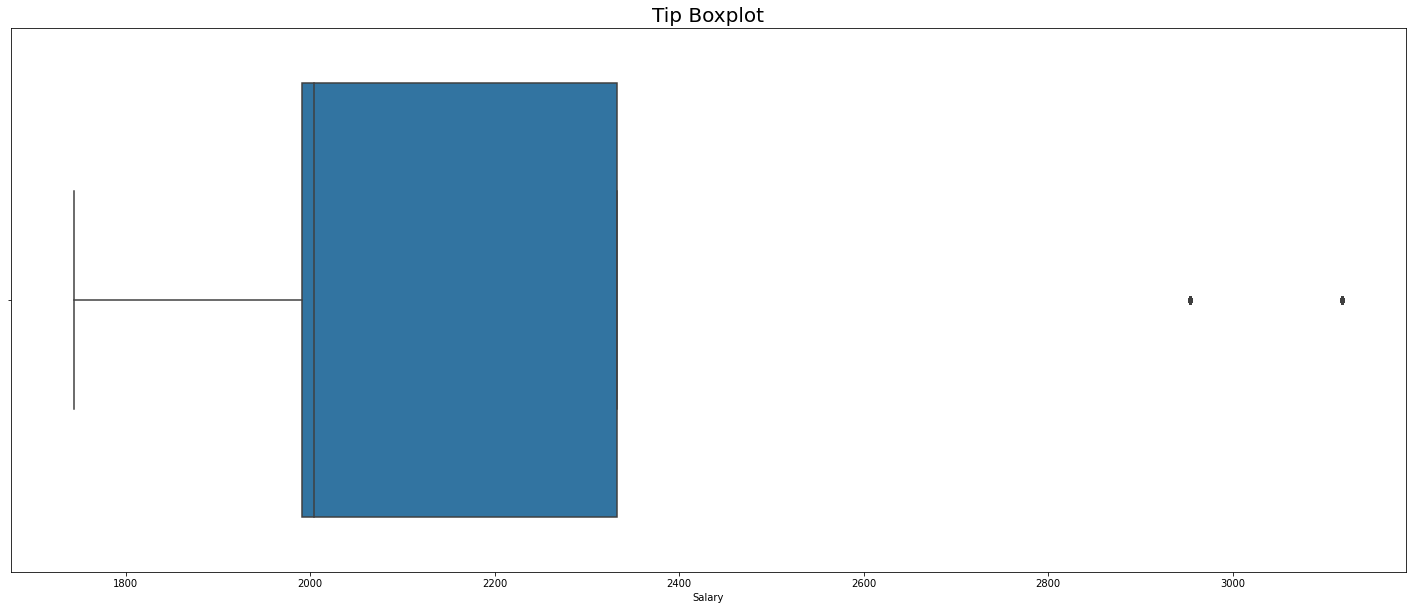

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
sns.boxplot(tabel1['Salary']) # create histogram in seaborn
plt.title('Tip Boxplot', size=20) # add title
plt.show()

In [47]:
outlier_index = tabel1[(tabel1['Salary'] < Q1_amount - (1.5 * iqr)) | (tabel1['Salary']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = tabel1[(tabel1['Salary'] > Q1_amount - (1.5 * iqr)) & (tabel1['Salary']< Q3_amount + (1.5 * iqr)) ].index
tabel1.loc[outlier_index].head()

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,PostalCode,...,ShipCity,ShipCountry,TerritoryID,TerritoryDescription,RegionID,RegionDescription,Gender,DurationWorkingTime,Age,AgeGeneration
0,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,98122,...,Graz,Austria,6897,Wilton ...,1,Eastern ...,Female,3,47,Generation X
1,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,98122,...,Graz,Austria,19713,Neward ...,1,Eastern ...,Female,3,47,Generation X
2,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,98122,...,Oulu,Finland,6897,Wilton ...,1,Eastern ...,Female,3,47,Generation X
3,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,98122,...,Oulu,Finland,19713,Neward ...,1,Eastern ...,Female,3,47,Generation X
4,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,98122,...,Bergamo,Italy,6897,Wilton ...,1,Eastern ...,Female,3,47,Generation X


## **Membuat Feature 'Total Salary and Bonus'**
Pada feature ini berfokus pada penambahan kolom baru berupa bonus dan satu kolom baru lainnya yaitu total salary dan bonus yang didapatkan oleh tiap-tiap employee dari perusahaan Northwind.

In [48]:
# Add new column of compensation for employee salary 
def convert_bonus_salary(row):
    if row['Title'] == 'Sales Representative':
        return 100
    elif row['Title'] == 'Inside Sales Coordinator':
        return 250
    elif row['Title'] == 'Sales Manager':
        return 350
    else:
        return 500

tabel1['Bonus'] = tabel1.apply(convert_bonus_salary, axis=1)

In [49]:
# Adding New Column With Lambda Function

tabel1['SalaryBonus'] = tabel1[['Salary', 'Bonus']].apply(lambda x:(x['Salary'] * x['Bonus']), axis = 1)
tabel1.head()

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,PostalCode,...,TerritoryID,TerritoryDescription,RegionID,RegionDescription,Gender,DurationWorkingTime,Age,AgeGeneration,Bonus,SalaryBonus
0,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,98122,...,6897,Wilton ...,1,Eastern ...,Female,3,47,Generation X,100,295400
1,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,98122,...,19713,Neward ...,1,Eastern ...,Female,3,47,Generation X,100,295400
2,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,98122,...,6897,Wilton ...,1,Eastern ...,Female,3,47,Generation X,100,295400
3,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,98122,...,19713,Neward ...,1,Eastern ...,Female,3,47,Generation X,100,295400
4,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,98122,...,6897,Wilton ...,1,Eastern ...,Female,3,47,Generation X,100,295400


In [50]:
# Export dataset
# tabel1.to_excel('df_data_employee.xlsx', index=False)

# **DATA VISUALIZATION & STATISTICS**

Setelah mendapatkan data yang sudah 'bersih' dan siap untuk digunakan, masuklah kita ke bagian analisis data dengan menggunakan visual sebagai medianya. Di sini, kita akan melakukan visualisasi data untuk mendapatkan beberapa insight yang kemudian dapat menjadi landasan dalam pengambilan keputusan dan penyusunan strategi yang kuat untuk mendapatkan profit yang sebesar-besarnya dengan kerugian yang minim.

In [51]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## **Distribution of Northwind Employee by Gender**

In [52]:
fig = px.bar(tabel1['Gender'].value_counts().head(),
            title = 'Gender')
fig.show()

Berdasarkan hasil visualisasi diatas kita dapat menarik kesimpulan bahwa employee dengan gender **Female** atau perempuan merupakan distribusi gender terbanyak perusahaan Northwind, dengan ini employee dengan gender perempuan sangat memegang peran dalam keberlangsungan transaksi perusahaan.

Sedangkan gender male atau laki-laki dapat terlihat memiliki kontribusi yang lebih rendah dari pada perempuan. Hal ini dikarenakan jumlah karyawan laki-laki memang jauh lebih sedikit dari pada karyawan perempuan untuk perusahaan Nortwhind. Oleh karena itu insight ini dapat dimanfaatkan nantinya untuk perusahaan Northwind dalam proses rekrutmen apabila ingin meningkatkan jumlah perekrutan karyawan dengan gender laki-laki.

## **Total of Orders Made by Category of Employee Age**

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



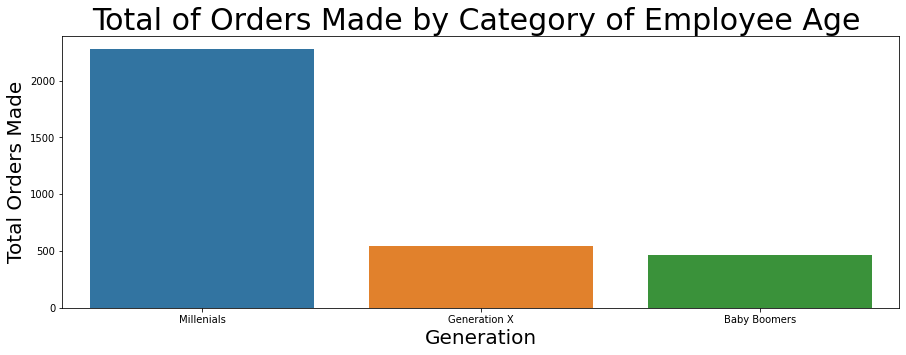

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(tabel1['AgeGeneration'],
            order = tabel1['AgeGeneration'].value_counts().index)

plt.xlabel('Generation', size = 20)
plt.ylabel('Total Orders Made', size = 20)
plt.title ('Total of Orders Made by Category of Employee Age ', size = 30)

plt.show()

Setelah sebelumnya kita mengetahui bagaimana sebaran data employee perusahaan Northwind berdasarkan gender nya, kali ini kita akan melihat bagaimana sebaran data pelayanan order oleh employee untuk customer berdasarkan kategory umur pegawai atau employee.

Dapat kita lihat kategori umur pegawai atau employee (Category of Employee Age) yang mendominasi total order yang dibuat oleh customer perusahaan Northwind adalah **Millenials**. Dimana rentang kategori umur untuk Millenials berkisar diantara **23 tahun - 38 tahun**.

Kemudian Generasi X dan Baby Boomers menempati posisi terendah yang berurutan setelah Millenials yang dapat kita lihat pada data visualisasi diatas. 


## **Employee Territorial Distribution**

In [54]:
# Define x and y label
x = tabel1['EmployeeID']
y = tabel1['TerritoryDescription']

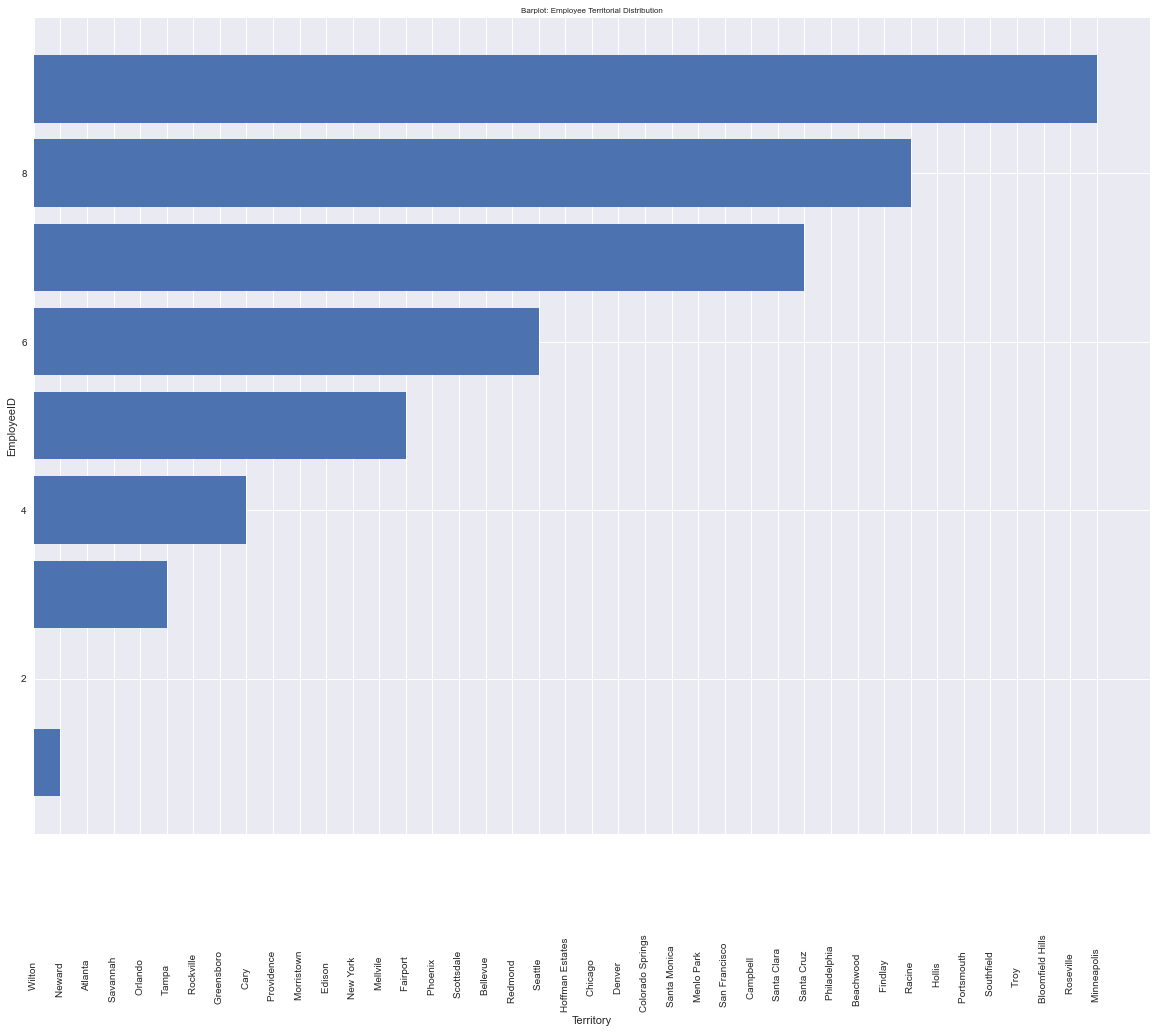

In [55]:
plt.style.use('seaborn')
plt.figure(figsize=(20,15)) 

plt.xlabel('Territory')
plt.ylabel('EmployeeID') 
plt.barh(x,y)
plt.tick_params(axis='x', rotation=90)

plt.title('Barplot: Employee Territorial Distribution', size=8) 
plt.show() 


Kemudian selanjutnya kita ingin mendapatkan informasi yang lebih mendalam dari sisi distribusi teritori employee perusahaan Northwind bekerja. Terlihat **teritori** lokasi yang memiliki **sebaran employee terbanyak** adalah **Minneapolis**, kemudian disusul oleh Racine dan Santa Cruz.

Kemudian untuk daerah teritori dengan sebaran employee bekerja terendah dari data visualisasi diatas adalah Neward. Dapat kita lihat, daerah teritori Neward memiliki presentase jumlah sebaran employee yang cukup jauh dari pada daerah teritori Tampa sebagai daerah teritori terendah kedua setelah Neward.

Oleh karena itu strategi yang mungkin bisa diterapkan oleh perusahaan Northwind diantaranya:
1. Membangun fasilitas dan akses kantor yang menunjang para pekerja atau employee perusahaan Northwind dalam bekerja.
1. Karena adanya kemungkinan pengaruh banyaknya customer di suatu daerah atau teritori tertentu yang mempengaruhi sebaran employee disuatu tempat, perusahaan Northwind sebaiknya juga dapat meningkatkan kualitas barang, promosi dan penjualan produk-produk Northwind agar dapat menarik customer.

## **Employee Regional Distribution**

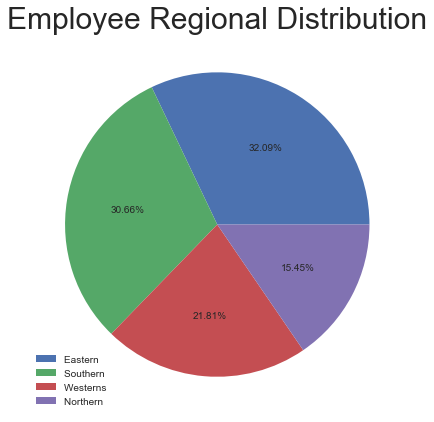

In [56]:
# Pie Chart Region Description

plt.style.use('seaborn')
plt.figure(figsize=(10,7))

plt.pie(tabel1['RegionDescription'].value_counts().values, 
        autopct='%.2f%%',shadow=False) # , explode= (0.1,0.2,0.1,0.1)

plt.title ('Employee Regional Distribution', size = 30)
plt.legend(tabel1['RegionDescription'].unique())
plt.show()

Dari pie chart diagram diatas dapat terlihat bahwa sebanyak 32.09% dari karyawan atau employee perusahaan Northwind terdistribusi di daerah Timur (Eastern), kemudian disusul sebanyak 30.66% dari karyawan atau employee terdistribusi pada daerah selatan (Southern), 21.81%  dari karyawan atau employee terdistribusi pada daerah barat (Western), dan yang terakhir sebanyak 15.45% dari karyawan atau employee perusahaan Northwind terdistribusi di daerah utara atau Northern.

Dari hasil tersebut dapat disimpulkan bahwa **sebaran** karyawan atau **employee perusahaan Northwind terbanyak** bertempat pada **region Eastern** atau daerah Timur.

## **Perbedaan Salary tiap Period of Employment**

Uji normalitas menggunakan Kolmogorov Smirnov, alasan penggunaan uji normalitas ini adalah:
- Uji Kolmogorov smirnov memiliki kelebihan yaitu tidak timbul banyak persepsi antar pengamat.
- Pengujian dengan menggunakan uji Kolmogorov smirnov juga terbilang sederhana.

In [57]:
# Uji perbandingan nilai Salary antar setiap Period of Employment (Normalitas)

from scipy.stats import kstest

ks_statistic, ks_pvalue = kstest(tabel1['Salary'], 'norm')

if ks_pvalue > 0.05: 
    print (f'Gagal Tolak H0 Karena P-Value ({ks_pvalue} > 5%)')
    print ('DATA BERDISTRIBUSI NORMAL')

else: 
    print (f'Tolak H0 Karena P-Value ({ks_pvalue} < 5%)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


Konsep dasar uji Kruskal Wallis:
- Uji kruskal wallis merupakan bagian dari statistik non-parametrik.
- Uji kruskal wallis digunakan sebagai alternatif dari uji one way anova ketika salah satu atau seluruh sebaran data tidak berdistribusi normal.

In [58]:
# Uji perbandingan nilai Salary antar setiap Period of Employment (Kruskal Wallis)
from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    tabel1[tabel1['DurationWorkingTime'] == 1]['Salary'],
    tabel1[tabel1['DurationWorkingTime'] == 2]['Salary'],
    tabel1[tabel1['DurationWorkingTime'] == 3]['Salary'],
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({ks_pvalue} < 5%)')
    print ('Terdapat Perbedaan Nilai Median Salary pada Setiap Period of Employment (Lama waktu kerja employee)')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({ks_pvalue} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median Salary pada Setiap Period of Employment (Lama waktu kerja employee)')

Tolak H0 Karena P-Value (0.0 < 5%)
Terdapat Perbedaan Nilai Median Salary pada Setiap Period of Employment (Lama waktu kerja employee)


## **Hubungan Salary dengan  Period of Employment dan Age**

In [59]:
tabel1[['Salary', 'DurationWorkingTime','Age']].corr(method = 'spearman')

,Salary,DurationWorkingTime,Age
Salary,1.000000,0.321652,-0.584604
DurationWorkingTime,0.321652,1.000000,0.102609
Age,-0.584604,0.102609,1.000000


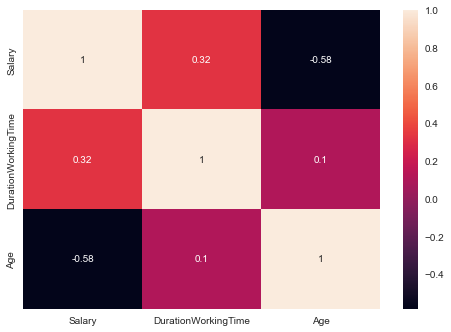

In [60]:
# Korelasi

sns.heatmap(tabel1[['Salary', 'DurationWorkingTime','Age']].corr('spearman'), annot=True)
plt.show()
	

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



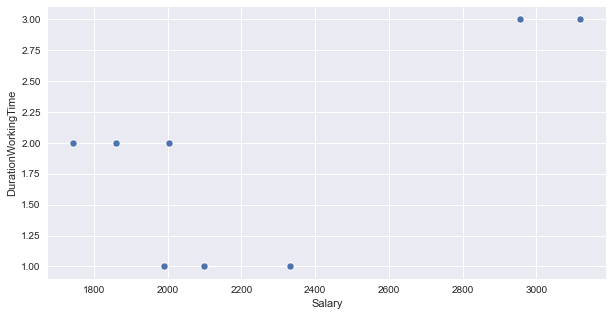

In [61]:
# Korelasi Antara Salary dan Period of Employment

plt.figure(figsize=(10,5))
sns.scatterplot(tabel1['Salary'], tabel1['DurationWorkingTime'])
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



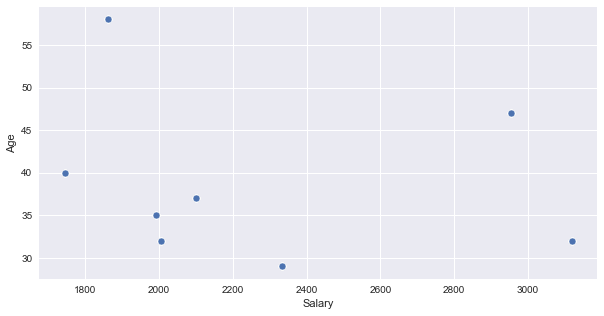

In [62]:
# Korelasi Antara Salary dan Age

plt.figure(figsize=(10,5))
sns.scatterplot(tabel1['Salary'], tabel1['Age'])
plt.show()

Dapat disimpulkan bahwa jenis korelasi pada kedua visualisasi data diatas adalah tidak berkorelasi, baik Salary dengan Period of Employment maupun hubungan antara Salary dengan Age.